In [9]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras import optimizers


In [10]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(32,32,1),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(120,activation='relu')) #what is this and next linie meaning??
model.add(Dense(64,activation='relu'))#??
model.add(Dense(46,activation='softmax')) # this i understood

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        8256      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               6912120   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                7744      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 6,931,270
Trainable params: 6,931,270
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(loss='categorical_crossentropy',optimizers='adam',metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen=ImageDataGenerator(rescale=1/255)

In [14]:
train_img_gen=img_gen.flow_from_directory('Downloads/ssfd/DevanagariHandwrittenCharacterDataset/Train',target_size=[32,32],
                                         batch_size=32,
                                         class_mode='categorical',
                                         color_mode='grayscale')

Found 78200 images belonging to 46 classes.


In [15]:
validate_img_gen=img_gen.flow_from_directory('Downloads/ssfd/DevanagariHandwrittenCharacterDataset/Test/'
                                            ,target_size=(32,32),
                                            batch_size=32,
                                            class_mode='categorical',
                                            color_mode='grayscale')


Found 13800 images belonging to 46 classes.


In [16]:
train_img_gen.class_indices

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 

In [ ]:
result=model.fit_generator(train_img_gen,
                          validation_data=validate_img_gen,
                          validation_steps=12,epochs=3,
                          steps_per_epoch=1500)

In [ ]:
model.save('dev_accuracy.h5')
model_json=model.to_json()
with open('dev_accuracy_model.json','w') as json_file:
    json_file.write(model_json)

(32, 32)
(1, 32, 32, 1)


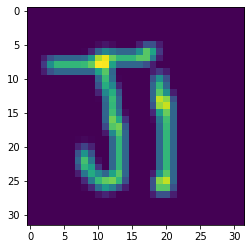

In [6]:
import cv2
import numpy as np
a=cv2.imread('2218.png.png',0)
b=cv2.resize(a,(32,32))
print(a.shape)
a=np.expand_dims(a,axis=0)
test_img=np.expand_dims(a,axis=0)
test_img=test_img.transpose((1,2,3,0))/255
print(test_img.shape)


In [ ]:
nep

In [7]:
a=model.predict_classes(test_img)
list(a)

NameError: name 'model' is not defined

In [51]:

{'क': 0,
 'ख': 1,
 'ग': 2,
 'घ': 3,
 'ङ': 4,
 'च': 5,
 'छ': 6,
 'ज': 7,
 'झ': 8,
 'ञ': 9,
 'ट': 10,
 'ठ': 11,
 'ड': 12,
 'ढ': 13,
 'ण': 14,
 'त': 15,
 'थ': 16,
 'द': 17,
 'ध': 18,
 'न': 19,
 'प': 20,
 'फ': 21,
 'ब': 22,
 'भ': 23,
 'म': 24,
 'य': 25,
 'र': 26,
 'ल': 27,
 'व': 29,
 'श': 30,
 'ष': 31,
 'स': 32,
 'ह': 33,
'क्ष':34,
'त्र':35,
'ज्ञ':36,
}


{'क': 0,
 'ख': 1,
 'ग': 2,
 'घ': 3,
 'ङ': 4,
 'च': 5,
 'छ': 6,
 'ज': 7,
 'झ': 8,
 'ञ': 9,
 'ट': 10,
 'ठ': 11,
 'ड': 12,
 'ढ': 13,
 'ण': 14,
 'त': 15,
 'थ': 16,
 'द': 17,
 'ध': 18,
 'न': 19,
 'प': 20,
 'फ': 21,
 'ब': 22,
 'भ': 23,
 'म': 24,
 'य': 25,
 'र': 26,
 'ल': 27,
 'व': 29,
 'श': 30,
 'ष': 31,
 'स': 32,
 'ह': 33,
 'क्ष': 34,
 'त्र': 35,
 'ज्ञ': 36}

In [56]:
newq={}
for k,v in nep.items():
    newq[v]=k

In [57]:
newq

{0: 'क',
 1: 'ख',
 2: 'ग',
 3: 'घ',
 4: 'ङ',
 5: 'च',
 6: 'छ',
 7: 'ज',
 8: 'झ',
 9: 'ञ',
 10: 'ट',
 11: 'ठ',
 12: 'ड',
 13: 'ढ',
 14: 'ण',
 15: 'त',
 16: 'थ',
 17: 'द',
 18: 'ध',
 19: 'न',
 20: 'प',
 21: 'फ',
 22: 'ब',
 23: 'भ',
 24: 'म',
 25: 'य',
 26: 'र',
 27: 'ल',
 29: 'व',
 30: 'श',
 31: 'ष',
 32: 'स',
 33: 'ह',
 34: 'क्ष',
 35: 'त्र',
 36: 'ज्ञ',
 37: '०',
 38: '१',
 39: '२',
 40: '३',
 41: '४',
 42: '५',
 43: '६',
 44: '७',
 45: '८'}